In [ ]:
!pip install kaggle
!kaggle datasets download rohanrao/formula-1-world-championship-1950-2020

Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
License(s): CC0-1.0
  0% 0.00/6.14M [00:00<?, ?B/s]
100% 6.14M/6.14M [00:00<00:00, 94.1MB/s]


In [ ]:
!unzip /content/formula-1-world-championship-1950-2020.zip

Archive:  /content/formula-1-world-championship-1950-2020.zip
  inflating: circuits.csv            
  inflating: constructor_results.csv  
  inflating: constructor_standings.csv  
  inflating: constructors.csv        
  inflating: driver_standings.csv    
  inflating: drivers.csv             
  inflating: lap_times.csv           
  inflating: pit_stops.csv           
  inflating: qualifying.csv          
  inflating: races.csv               
  inflating: results.csv             
  inflating: seasons.csv             
  inflating: sprint_results.csv      
  inflating: status.csv              


In [ ]:
!kaggle datasets download quantumkaze/f1-weather-dataset-2018-2023
!unzip /content/f1-weather-dataset-2018-2023

Dataset URL: https://www.kaggle.com/datasets/quantumkaze/f1-weather-dataset-2018-2023
License(s): other
  0% 0.00/217k [00:00<?, ?B/s]
100% 217k/217k [00:00<00:00, 21.2MB/s]
Archive:  /content/f1-weather-dataset-2018-2023.zip
  inflating: F1 Weather(2023-2018).csv  


In [ ]:
!pip install --quiet plotly

In [ ]:
!pip install --quiet lxml

### Importing Modules

In [ ]:
import requests
from bs4 import BeautifulSoup
from io import StringIO

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Reading Dataset

In [ ]:
df_circuits = pd.read_csv("/content/circuits.csv")
df_constructors = pd.read_csv("/content/constructors.csv")
df_constructor_results = pd.read_csv("/content/constructor_results.csv")
df_constructor_standings = pd.read_csv("/content/constructor_standings.csv")
df_driver_standings = pd.read_csv("/content/driver_standings.csv")
df_drivers = pd.read_csv("/content/drivers.csv")
df_lap_times = pd.read_csv("/content/lap_times.csv")
df_pit_stops = pd.read_csv("/content/pit_stops.csv")
df_qualifying = pd.read_csv("/content/qualifying.csv")
df_results = pd.read_csv("/content/results.csv")
df_seasons = pd.read_csv("/content/seasons.csv")
df_sprint_results = pd.read_csv("/content/sprint_results.csv")
df_status = pd.read_csv("/content/status.csv")
df_races = pd.read_csv("/content/races.csv")
df_weather = pd.read_csv("/content/F1 Weather(2023-2018).csv")
df_status = pd.read_csv("/content/status.csv")

## Data Collection
### Gather the necessary data. This could involve scraping data from websites, using APIs (check my [Kaggle Notebook](http://https://www.kaggle.com/code/quantumkaze/f1-weather-extract-using-fastf1)), or finding datasets online. The data might include details about the drivers, teams, cars, races, circuits, weather conditions, etc.

In [ ]:
# Extract the length of track and no. turns from the wikipedia url given in df_circuits.
# And merge Length and Turns into the dataframe df_circuits

len_turn_data = []

def length_turn(url, cId):
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element
    table = soup.find("table", class_="infobox")
    df = pd.read_html(StringIO(str(table)))[0]

    # If Length/Turns is not available set them to 0.
    try:
        length = df.loc[np.where(df == 'Length')[0][0]].iloc[1]
        turns = df.loc[np.where(df == 'Turns')[0][0]].iloc[1]
    except IndexError:
        length = '0.0000'
        turns = '0'

    # Append the List: [circuitId, Length, Turns]
    len_turn_data.append([cId, length, turns])

# Function to extract Length and Turns for each circuit according to circuitId
for cId, url in zip(df_circuits.circuitId, df_circuits.url):
    length_turn(url, cId)

# Convert the Length and Turns column in float and int types
df_len_turn = pd.DataFrame(data=len_turn_data, columns=["circuitId", "Length", "Turns"])

df_len_turn['Length'] = df_len_turn['Length'].str[:5].astype(float)
df_len_turn['Turns'] = df_len_turn['Turns'].str[:2].astype(int)

# Merge the Length & Turns dataframe to df_circuits according to circuitId
# df_circuits = df_circuits.merge(df_len_turn, on='circuitId', how='left')

In [ ]:
# prompt: Using dataframe df_circuits: merge df_circuits with df_len_turn based on 'circuitId' and save it to df_circuits

# Merge df_circuits with df_len_turn based on 'circuitId'
# Assuming df_len_turn is already defined and available

# Perform the merge operation, updating df_circuits inplace.
# The merge is done based on the 'circuitId' column.
#  How='left' indicates that all rows from the left dataframe (df_circuits)
#  will be kept, and matching rows from df_len_turn will be joined.
# If there's no match in df_len_turn for a given 'circuitId' in df_circuits,
# the columns from df_len_turn for that row will be NaN.
df_circuits = pd.merge(df_circuits, df_len_turn, on='circuitId', how='left')
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,5.278,14
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...,5.543,15
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...,5.412,15
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,4.657,14
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park,5.338,14


# Data Cleaning and Preprocessing
### In this section. I will clean the data and handle missing values, outliers, and incorrect data. Convert data into the correct formats. For example, time durations might need to be converted into seconds for easier analysis.

In [ ]:
# Uncomment to set row option

#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [ ]:
# Circuits
df_circuits

# Replaces '\N' values with NaN
df_circuits['alt'] = df_circuits['alt'].replace('\\N', np.nan)
df_circuits['alt'] = df_circuits['alt'].astype(float)

df_circuits[df_circuits['alt'].isna()] # 3 rows
df_circuits[df_circuits['Length']==0.000] # 7 rows

# Replacing missing values with mean of data
df_circuits['Length'] = df_circuits['Length'].replace(0, df_circuits[df_circuits['Length'] != 0]['Length'].mean()).astype(float)
df_circuits['Turns'] = df_circuits['Turns'].replace(0, df_circuits[df_circuits['Turns'] != 0]['Turns'].mean()).astype(int)
df_circuits.loc[:, 'alt'] = df_circuits['alt'].fillna(df_circuits['alt'].mean()).astype(int)

df_circuits['laps'] = (305/df_circuits['Length']).astype(int)

df_circuits.to_csv('circuits.csv', index=False)
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns,laps
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,5.278,14,57
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,5.543,15,55
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0,http://en.wikipedia.org/wiki/Bahrain_Internati...,5.412,15,56
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,4.657,14,65
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0,http://en.wikipedia.org/wiki/Istanbul_Park,5.338,14,57


In [ ]:
# Constructor Results
df_constructor_results

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12500,17005,1132,117,10.0,\N
12501,17006,1132,3,2.0,\N
12502,17007,1132,215,1.0,\N
12503,17008,1132,15,0.0,\N


In [ ]:
# Constructor Standings
df_constructor_standings

df_constructor_standings = df_constructor_standings.merge(df_constructors[['constructorId', 'name']], on='constructorId', how='left')

df_constructor_standings = df_constructor_standings.merge(df_races[['raceId', 'date']], on='raceId')

In [ ]:
df_constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,name,date
0,1,18,1,14.0,1,1,1,McLaren,2008-03-16
1,2,18,2,8.0,3,3,0,BMW Sauber,2008-03-16
2,3,18,3,9.0,2,2,0,Williams,2008-03-16
3,4,18,4,5.0,4,4,0,Renault,2008-03-16
4,5,18,5,2.0,5,5,0,Toro Rosso,2008-03-16


In [ ]:
df_drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


In [ ]:
# Drivers
df_drivers

# No need for driver number
df_drivers.drop('number', axis=1, inplace=True)

# Adding driver 'Name' column instead of forename and surname
df_drivers['Name'] = df_drivers['forename'] + ' ' + df_drivers['surname']

# Adding code for each driver i.e, the first 3 letter of the surname
df_drivers['surname'] = df_drivers['surname'].str.replace(' ', '')

def replace_code(row):
    if row['code'] == '\\N':
        return row['surname'][:3].upper()
    else:
        return row['code']

df_drivers['code'] = df_drivers.apply(replace_code, axis=1)

# Dropping columns
df_drivers.drop(columns=['driverRef', 'forename', 'surname', 'url'], axis=1, inplace=True)

df_drivers.to_csv('drivers.csv', index=False)
df_drivers.head()

,driverId,code,dob,nationality,Name
0,1,HAM,1985-01-07,British,Lewis Hamilton
1,2,HEI,1977-05-10,German,Nick Heidfeld
2,3,ROS,1985-06-27,German,Nico Rosberg
3,4,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,KOV,1981-10-19,Finnish,Heikki Kovalainen


In [ ]:
# Driver Standings
df_driver_standings

df_driver_standings = df_driver_standings.merge(df_drivers[['driverId', 'Name']], on='driverId', how='left')
df_driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name
0,1,18,1,10.0,1,1,1,Lewis Hamilton
1,2,18,2,8.0,2,2,0,Nick Heidfeld
2,3,18,3,6.0,3,3,0,Nico Rosberg
3,4,18,4,5.0,4,4,0,Fernando Alonso
4,5,18,5,4.0,5,5,0,Heikki Kovalainen


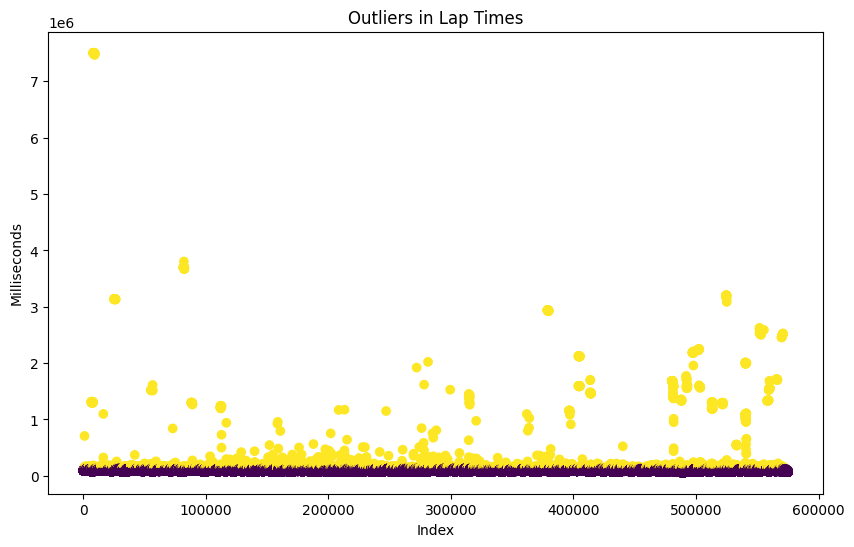

In [ ]:
# Lap Times
df_lap_times

df_lap_times = df_lap_times[df_lap_times['raceId'].isin(df_races['raceId'])]

# Assuming df_lap_times is your DataFrame and 'milliseconds' is the column with lap times
Q1 = df_lap_times['milliseconds'].quantile(0.25)
Q3 = df_lap_times['milliseconds'].quantile(0.75)
IQR = Q3 - Q1

# Define a filter for outliers
filter = (df_lap_times['milliseconds'] >= Q1 - 1.5 * IQR) & (df_lap_times['milliseconds'] <= Q3 + 1.5 *IQR)

# Create a new column 'outlier' that is True where the row is an outlier and False otherwise
df_lap_times['outlier'] = ~filter

# Plot the 'milliseconds' column, coloring by the 'outlier' column
plt.figure(figsize=(10, 6))
plt.scatter(df_lap_times.index, df_lap_times['milliseconds'], c=df_lap_times['outlier'])
plt.title('Outliers in Lap Times')
plt.xlabel('Index')
plt.ylabel('Milliseconds')
plt.show()

# Todo: Lap times acc to drivers

In [ ]:
# Removing lap times above 10 minutes

df_lap_times = df_lap_times[df_lap_times['milliseconds'] < 600000]
df_lap_times.head()

,raceId,driverId,lap,position,time,milliseconds,outlier
0,841,20,1,1,1:38.109,98109,False
1,841,20,2,1,1:33.006,93006,False
2,841,20,3,1,1:32.713,92713,False
3,841,20,4,1,1:32.803,92803,False
4,841,20,5,1,1:32.342,92342,False


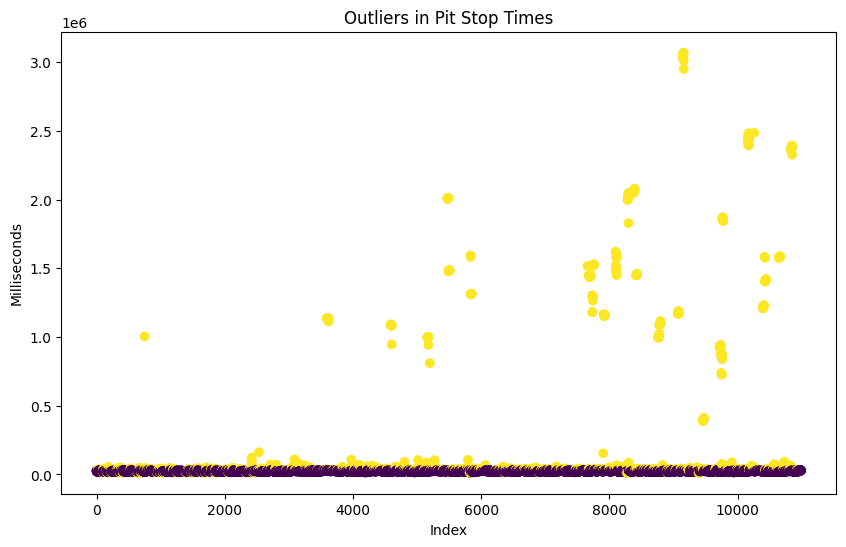

In [ ]:
# Pit Stops
df_pit_stops

df_pit_stops = df_pit_stops[df_pit_stops['raceId'].isin(df_races['raceId'])]

import matplotlib.pyplot as plt

# Assuming df_pit_stops is your DataFrame and 'milliseconds' is the column with lap times
Q1 = df_pit_stops['milliseconds'].quantile(0.25)
Q3 = df_pit_stops['milliseconds'].quantile(0.75)
IQR = Q3 - Q1

# Define a filter for outliers
filter = (df_pit_stops['milliseconds'] >= Q1 - 1.5 * IQR) & (df_pit_stops['milliseconds'] <= Q3 + 1.5 *IQR)

# Create a new column 'outlier' that is True where the row is an outlier and False otherwise
df_pit_stops['outlier'] = ~filter

# Plot the 'milliseconds' column, coloring by the 'outlier' column
plt.figure(figsize=(10, 6))
plt.scatter(df_pit_stops.index, df_pit_stops['milliseconds'], c=df_pit_stops['outlier'])
plt.title('Outliers in Pit Stop Times')
plt.xlabel('Index')
plt.ylabel('Milliseconds')
plt.show()

# Todo: Lap times acc to drivers

In [ ]:
# Removing pit stop times above 10 minutes

df_pit_stops = df_pit_stops[df_pit_stops['milliseconds'] < 500000]
df_pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,outlier
0,841,153,1,1,17:05:23,26.898,26898,False
1,841,30,1,1,17:05:52,25.021,25021,False
2,841,17,1,11,17:20:48,23.426,23426,False
3,841,4,1,12,17:22:34,23.251,23251,False
4,841,13,1,13,17:24:10,23.842,23842,False


In [ ]:
# Qualifying
df_qualifying

# Converting q1, q2, q3 into milliseconds
def convert_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    minutes, seconds = time_str.split(':')
    total_seconds = int(minutes) * 60 + float(seconds)
    return total_seconds

columns = ['q1', 'q2', 'q3']

for column in columns:
    df_qualifying[column] = df_qualifying[column].replace('\\N', np.nan)
    df_qualifying[column] = df_qualifying[column].apply(convert_to_seconds)

# Storing the average of q1, q2, q3 in time column
df_qualifying['Qualifying Time'] = df_qualifying[['q1', 'q2', 'q3']].mean(axis=1).round(3)

# Time converted from M:S.ms to ms
# Averaged the 3 columns q1, q2, q3 to get qualifying time
df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,Qualifying Time
0,1,18,1,1,22,1,86.572,85.187,86.714,86.158
1,2,18,9,2,4,2,86.103,85.315,86.869,86.096
2,3,18,5,1,23,3,85.664,85.452,87.079,86.065
3,4,18,13,6,2,4,85.994,85.691,87.178,86.288
4,5,18,2,2,3,5,85.960,85.518,87.236,86.238


In [ ]:
# Results
df_results

df_results['position'] = df_results['position'].replace('\\N', 0)
df_results['milliseconds'] = df_results['milliseconds'].replace('\\N', 0)
df_results['fastestLapTime'] = df_results['fastestLapTime'].replace('\\N', 0)
df_results['fastestLapSpeed'] = df_results['fastestLapSpeed'].replace('\\N', 0)


df_results['position'] = df_results['position'].astype(int)
df_results['milliseconds'] = df_results['milliseconds'].astype(float)
df_results['fastestLapSpeed'] = df_results['fastestLapSpeed'].astype(float)


df_results['milliseconds'] = df_results['milliseconds'] / 1000
df_results = df_results.rename(columns={'milliseconds': 'seconds'})

df_results = df_results.merge(df_races[['raceId', 'date', 'circuitId']], on='raceId')
# Time converted from M:S.ms to ms
# Dates added
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,seconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,date,circuitId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690.616,39,2,1:27.452,218.300,1,2008-03-16,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696.094,41,3,1:27.739,217.586,1,2008-03-16,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698.779,41,5,1:28.090,216.719,1,2008-03-16,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707.797,58,7,1:28.603,215.464,1,2008-03-16,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708.630,43,1,1:27.418,218.385,1,2008-03-16,1


In [ ]:
# Sprint Results
df_sprint_results

df_sprint_results['fastestLapTime'] = df_sprint_results['fastestLapTime'].replace('\\N', np.nan)

df_sprint_results = df_sprint_results.merge(df_races[['raceId', 'date']], on='raceId')

# Time converted from M:S.ms to ms
# Dates added
df_sprint_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId,date
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1,2021-07-18
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1,2021-07-18
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1,2021-07-18
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1,2021-07-18
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1,2021-07-18


In [ ]:
# Weather
df_weather

df_weather.drop(columns='Time', inplace=True)

# Function to get store Round Year-wise and calculate average
def weatherAverage(df_weather, year):
    df_year = df_weather[df_weather['Year'] == year]
    df_weather = df_weather[df_weather['Year'] != year]
    rainfall = df_weather['Rainfall']
    df_year = df_year.groupby('Round Number').mean().round(1).reset_index()

    df_weather = pd.concat([df_weather, df_year])
    return df_weather

years = [x for x in range(2018, 2024)]

for year in years:
    df_weather = weatherAverage(df_weather, year)

# Now I'll add the circuitId and RaceId for to the weather dataset
df_weather = df_weather.rename(columns={"Year": "year", "Round Number": "round"})
df_weather = pd.merge(df_weather, df_races[['raceId', 'circuitId', 'year', 'round']], on=['year', 'round'], how='left')
df_weather.head()

,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,round,year,raceId,circuitId
0,24.1,30.9,997.0,0.0,36.3,294.1,3.7,1,2018.0,989,1
1,28.0,47.4,1009.5,0.0,32.2,167.4,1.0,2,2018.0,990,3
2,19.4,24.1,1018.1,0.0,37.0,127.4,1.8,3,2018.0,991,17
3,16.7,45.7,1021.9,0.0,25.3,123.8,2.2,4,2018.0,992,73
4,16.1,52.3,1001.5,0.8,32.3,98.7,2.0,5,2018.0,993,4


# Exploratory Data Analysis (EDA)
Explore the data to understand the patterns, trends, and relationships. Use visualizations to help understand the data better. This step might give you insights that could help refine your problem statement or generate new hypotheses.

Current Hypothesis: Viewing the entire formula 1 as a whole (since 1980). Creating a general model for each circuit. (Might highly genralize some races)
Will be working on this. Then move on to next phase.

(There is another concern over the period that should be covered. More years mean more data, but is that data significant for current F1 era?
Thoughts: Most likely not, Races from 1950-1980 were very different than what are today. So which for the current era of Formula I would like to start from 1980s for now.
But after the first iteration of model using data from 1980s. I can change the era (2000-2005, 2006-2008, 2009-2013, 2014-2021 (mercedes!), 2022-present)

- There is also a connection between the winner and era. The Mercedes Era was from 2014 to 2020. Now it's Red Bull, before it was Ferrari during 2000s. So it changes according to the new regulations and specifications. New Regulation will come at 2026 (which could mean Red Bull no longer in the run for championship!)

Next Hypothesis: Train model for individual circuits rather than a whole season. (Could introduce noise)

Possible Fix: Using both models. Figure out which model works better for which circuit. For an average circuit, the general model should perform better. But for unique circuits like Manaco, or Las Vegas the Model for individual circuit should perform better

In [ ]:
!pip install --quiet folium
# Circuits
import folium

# Create a Map instance
m = folium.Map(location=[20, 0], zoom_start=2)

for idx, row in df_circuits.iterrows():
    # Place marker for each circuit
    folium.Marker([row['lat'], row['lng']], popup=f"{row['location']}, {row['country']}").add_to(m)

# Show the map
m

### Hypothesis 1: Constructor Points vs Constructor Wins: Assuming more number of points scored by team leads to more number of wins.

In [ ]:
df_constructor_points = df_constructor_standings.groupby('name')['points'].sum().sort_values(ascending=False).reset_index()

df_constructor_wins = df_constructor_standings[df_constructor_standings['position']==1].groupby('name').size().reset_index()
df_constructor_wins = df_constructor_wins.rename(columns={0: 'Wins'})

#Plotting Graph
df = pd.merge(df_constructor_points, df_constructor_wins, on='name')

# Create a Figure instance
fig = go.Figure()

# Add a line for each team
for team in df['name'].unique():
    df_team = df[df['name'] == team]
    fig.add_trace(go.Scatter(x=df_team['Wins'], y=df_team['points'], mode='lines+markers', name=team))

# Update layout
fig.update_layout(title_text='<b>Constructor Points vs Wins</b>', titlefont=dict(family='Arial, sans-serif', size=30), title_x=0.5, xaxis_title="Wins", yaxis_title="Points")

# Show the plot
fig.show()

In [ ]:
# Correlation Factor
correlation = df['points'].corr(df['Wins'])
print(correlation)

0.9584105143414808


Conclusion 1: This mean that 'No. of Points' and 'No. of Wins' have positive correlation.

### Hypothesis 2: Driver Points vs Driver Wins: Assuming more number of points scored by driver leads to more number of wins similar to constructors win


In [ ]:
df_driver_points = df_driver_standings.groupby('Name')['points'].sum().sort_values(ascending=False).reset_index()

df_driver_wins = df_driver_standings[df_driver_standings['position']==1].groupby('Name').size().reset_index()
df_driver_wins = df_driver_wins.rename(columns={0: 'Wins'})

#Plotting Graph
df = pd.merge(df_driver_points, df_driver_wins, on='Name')

# Create a Figure instance
fig = go.Figure()

# Add a line for each team
for team in df['Name'].unique():
    df_team = df[df['Name'] == team]
    fig.add_trace(go.Scatter(x=df_team['Wins'], y=df_team['points'], mode='lines+markers', name=team))

# Update layout
fig.update_layout(title_text='<b>Driver Points vs Wins</b>', titlefont=dict(family='Arial, sans-serif', size=30), title_x=0.5, xaxis_title="Wins", yaxis_title="Points")

# Show the plot
fig.show()

In [ ]:
# Correlation Factor
correlation = df['points'].corr(df['Wins'])
print(correlation)

0.6933340535642217


Conclusion 2: This mean that 'No. of Points' and 'No. of Wins' have positive correlation. But not as much as constructors

### Hypothesis 3: Higher on grid, more chances to win!
Also qualifying time == grid position (lesser the time, higher on grid)

In [ ]:
df_grid_wins = df_results[['raceId', 'driverId', 'grid', 'position']].copy()
df_grid_wins['Win'] = df_grid_wins['position'].apply(lambda x: 1 if x == 1 else 0)

mean_wins_by_grid = (df_grid_wins.groupby('grid')['Win'].mean()*100).round(2)

In [ ]:
mean_wins_by_grid

,Win
grid,
0,0.00
1,42.35
2,23.81
3,12.16
4,5.89
5,4.38
6,3.59
7,2.05
8,1.52


Conclusion 3: Clearly see the relation between grid position and Wins.

### Hypothesis 4: Relationship with Weather?
Rainfall can have huge impact on races as well as dry or humid weather or Hot or cold weather.
Weather data for races is quite limited (2023-2018). So the weather analysis will only be done for these years.

In [ ]:
threshold = 0.5
percentage_rain = (((df_weather['Rainfall'] > threshold).sum() / len(df_weather)) * 100).round(2)
print("Percent of races when it rained more than 50% of the race: ", percentage_rain)

races_in_rain = df_weather[df_weather['Rainfall']>0]

# Before we saw that grid 1, 2, 3 are likely to win 88% of the races. We would like to see how it changes during rain. Note that data is very less.

df_rain_grid_wins = df_grid_wins[df_grid_wins['raceId'].isin(races_in_rain['raceId'])]

mean_wins_by_grid = (df_rain_grid_wins.groupby('grid')['Win'].mean()*100).round(2)
mean_wins_by_grid

Percent of races when it rained more than 50% of the race:  4.17


,Win
grid,
0,0.00
1,46.15
2,16.00
3,15.38
4,3.85
5,0.00
6,7.69
7,0.00
8,3.85


# Feature Engineering:
Create new features that might help improve the performance of your model. This could involve creating features that represent a driver's past performance, the performance of their team, etc.

Here I will be creating features (variables) for my model. These could include Constructor Experience, Driver Experience, Driver Age, Driver Wins, Constructor Wins, Driver Exp with Constructor, **Weather score**, Avg Pitstop time of constructor, DNF score (anything except finishing i.e., DNF, Accident, etc), CircuitsId, Length, Turns, Average Weather on circuit.

In [ ]:
# Constructor Experience (By races, +1 for each driver)

df_constructor_experience = df_results[['raceId', 'constructorId', 'date']].sort_values('date')

# Calculate the cumulative count of each constructor
df_constructor_experience['Constructor Experience'] = df_constructor_experience.groupby('constructorId').cumcount() + 1
df_constructor_experience.head()


,raceId,constructorId,date,Constructor Experience
20034,833,154,1950-05-13,1
20044,833,151,1950-05-13,1
20035,833,51,1950-05-13,1
20043,833,151,1950-05-13,2
20042,833,154,1950-05-13,2


In [ ]:
# Driver Experience (By races, +1 for each race)

df_driver_experience = df_results[['raceId', 'driverId', 'date']].sort_values('date')

# Calculate the cumulative count of each driver
df_driver_experience['Driver Experience'] = df_driver_experience.groupby('driverId').cumcount() + 1
df_driver_experience.head()

,raceId,driverId,date,Driver Experience
20034,833,660,1950-05-13,1
20044,833,790,1950-05-13,1
20035,833,579,1950-05-13,1
20043,833,661,1950-05-13,1
20042,833,789,1950-05-13,1


In [ ]:
# Driver Age

df_age = df_results[['raceId', 'driverId', 'date']]
df_age = pd.merge(df_age, df_drivers[['driverId', 'dob']], on='driverId', how='left')

# Convert 'dob' and 'date' to datetime if they are not already
df_age['dob'] = pd.to_datetime(df_age['dob'])
df_age['date'] = pd.to_datetime(df_age['date'])

# Calculate age at the time of each race
df_age['Driver Age'] = (df_age['date'] - df_age['dob']).dt.days // 365

# Create the new dataframe with 'raceId', 'driverId', and 'age'
df_driver_age = df_age[['raceId', 'driverId', 'Driver Age']]
df_driver_age.head()

,raceId,driverId,Driver Age
0,18,1,23
1,18,2,30
2,18,3,22
3,18,4,26
4,18,5,26


In [ ]:
# Driver Wins

df_driver_wins = df_results[['raceId', 'driverId', 'position', 'date']].sort_values('date')

# Create a new column 'Win' which is 1 if the position is 1, else 0
df_driver_wins['Win'] = df_driver_wins['position'].apply(lambda x: 1 if x == 1 else 0)

# Calculate the cumulative sum of wins for each driver
df_driver_wins['Driver Wins'] = df_driver_wins.groupby('driverId')['Win'].cumsum()
df_driver_wins.head()

,raceId,driverId,position,date,Win,Driver Wins
20034,833,660,11,1950-05-13,0,0
20044,833,790,0,1950-05-13,0,0
20035,833,579,0,1950-05-13,0,0
20043,833,661,0,1950-05-13,0,0
20042,833,789,0,1950-05-13,0,0


In [ ]:
# Constructor Wins

df_constructor_wins = df_constructor_standings[['raceId', 'constructorId', 'position', 'date']].sort_values('date')

# Create a new column 'Win' which is 1 if the position is 1, else 0
df_constructor_wins['Win'] = df_constructor_wins['position'].apply(lambda x: 1 if x == 1 else 0)

# Calculate the cumulative sum of wins for each driver
df_constructor_wins['Constructor Wins'] = df_constructor_wins.groupby('constructorId')['Win'].cumsum()

df_constructor_wins['Constructor Wins'] = df_constructor_wins['Constructor Wins'].astype(int)
df_constructor_wins

,raceId,constructorId,position,date,Win,Constructor Wins
9388,765,6,2,1958-01-19,0,0
9387,765,105,3,1958-01-19,0,0
9389,765,87,1,1958-01-19,1,1
9375,766,127,8,1958-05-18,0,0
9376,766,125,7,1958-05-18,0,0
...,...,...,...,...,...,...
13265,1132,117,5,2024-07-07,0,0
13266,1132,15,10,2024-07-07,0,0
13267,1132,210,7,2024-07-07,0,0
13268,1132,215,6,2024-07-07,0,0


In [ ]:
# Driver Exp with Constructor
df_driver_constructor_exp = df_results[['raceId', 'constructorId', 'driverId', 'date']].sort_values('date')

df_driver_constructor_exp['Driver Constructor Experience'] = df_driver_constructor_exp.groupby(['driverId', 'constructorId']).cumcount() + 1
df_driver_constructor_exp.head()

,raceId,constructorId,driverId,date,Driver Constructor Experience
20034,833,154,660,1950-05-13,1
20044,833,151,790,1950-05-13,1
20035,833,51,579,1950-05-13,1
20043,833,151,661,1950-05-13,1
20042,833,154,789,1950-05-13,1


In [ ]:
# Average Pit Stop time

#df_merged = pd.merge(df_pit_stops, df_results[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'], how='inner')
#df_avg_duration = df_merged.groupby('constructorId')['milliseconds'].mean().reset_index().round(2)
#df_results['constructorId'].unique()

In [ ]:
# DNF Score

# Removing '+n Laps'
df_status = df_status[~df_status['status'].str.contains("\+\d+ Laps")]
df_status = df_status.drop(0)

df_finish = df_results[['raceId', 'driverId', 'constructorId', 'statusId', 'date']].copy()
df_finish.loc[:, 'Finish'] = (~df_finish['statusId'].isin(df_status['statusId'])).astype(int)
df_finish['date'] = pd.to_datetime(df_finish['date'])

# Sort the DataFrame by date in ascending order
df_finish = df_finish.sort_values('date')

# Calculate the cumulative average of the 'Finish' column for each constructor
df_finish['DNF Score'] = df_finish.groupby('constructorId')['Finish'].expanding().mean().round(2).reset_index(level=0, drop=True)
df_finish.head()

,raceId,driverId,constructorId,statusId,date,Finish,DNF Score
20034,833,660,154,16,1950-05-13,1,1.0
20044,833,790,151,126,1950-05-13,0,0.0
20035,833,579,51,44,1950-05-13,0,0.0
20043,833,661,151,6,1950-05-13,0,0.0
20042,833,789,154,51,1950-05-13,0,0.5


Now I will create a complete table with all the features for all races, drivers and constructors with the variables created in the Feature Engineering section.

In [ ]:
formula_1 = df_results[['raceId', 'driverId', 'constructorId', 'grid', 'position', 'laps', 'seconds', 'fastestLapSpeed', 'date', 'circuitId']]

# Circuits Length and Turns
formula_1 = formula_1.merge(df_circuits[['circuitId', 'Length', 'Turns']], on='circuitId', how='left')

# Constructor Experience (No. of races by drivers)
formula_1 = formula_1.merge(df_constructor_experience[['raceId', 'constructorId', 'Constructor Experience']], on=['raceId', 'constructorId'], how='left')

# Driver Experience (No. of races)
formula_1 = formula_1.merge(df_driver_experience[['raceId', 'driverId', 'Driver Experience']], on=['raceId', 'driverId'], how='left')

# Driver Age
formula_1 = formula_1.merge(df_driver_age[['raceId', 'driverId', 'Driver Age']], on=['raceId', 'driverId'], how='left')

# Driver Wins
formula_1 = formula_1.merge(df_driver_wins[['raceId', 'driverId', 'Driver Wins']], on=['raceId', 'driverId'], how='left')

# Constructor Wins
formula_1 = formula_1.merge(df_constructor_wins[['raceId', 'constructorId', 'Constructor Wins']], on=['raceId', 'constructorId'], how='left')

# Driver Experience with Constructor
formula_1 = formula_1.merge(df_driver_constructor_exp[['raceId', 'constructorId', 'driverId', 'Driver Constructor Experience']], on=['raceId', 'constructorId', 'driverId'], how='left')

# DNF Score
formula_1 = formula_1.merge(df_finish[['raceId', 'constructorId', 'DNF Score']], on=['raceId', 'constructorId'], how='left')

In [ ]:
# Adding a new feature 'prev_position' that holds the position of driver from previous race
# Possible improvement in this could be averaging out last 3 races instead of 1.

formula_1 = formula_1.sort_values(['driverId', 'date'])
formula_1['prev_position'] = formula_1.groupby('driverId')['position'].shift(1)
formula_1['prev_position'] = formula_1['prev_position'].fillna(0)

In [ ]:
# Clean the final table

formula_1 = formula_1.drop_duplicates(subset=['raceId', 'driverId', 'constructorId'], keep='last')

# Change second argument to select positions for prediction
pos = list(range(1, 21))
formula_1 = formula_1[formula_1['position'].isin(pos)]

formula_1 = formula_1[formula_1['Constructor Wins'].notnull()]

formula_1 = formula_1[formula_1['date']>='1980-01-01']

#formula_1['podium'] = formula_1['position'].apply(lambda x: x) # All Positions
#formula_1['podium'] = formula_1['position'].apply(lambda x: x if 1<=x<=3 else 0) # All Positions, (this creates a false boost in accuracy)
formula_1['podium'] = formula_1['position'].apply(lambda x: x if 1<=x<=3 else 0)

formula_1.to_csv('formula1.csv', index=False)
#formula_1[formula_1['prev_position']!=formula_1['podium']]
formula_1

,raceId,driverId,constructorId,grid,position,laps,seconds,fastestLapSpeed,date,circuitId,...,Turns,Constructor Experience,Driver Experience,Driver Age,Driver Wins,Constructor Wins,Driver Constructor Experience,DNF Score,prev_position,podium
1483,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,...,14,1211,1,22,0,151.0,1,0.50,3.0,3
1567,37,1,1,4,2,56,5552.487,206.355,2007-04-08,2,...,15,1213,2,22,0,151.0,2,0.51,2.0,2
1655,38,1,1,2,2,57,5609.875,206.674,2007-04-15,3,...,15,1215,3,22,0,151.0,3,0.51,2.0,2
1743,39,1,1,4,2,65,5503.020,202.205,2007-05-13,4,...,14,1217,4,22,0,151.0,4,0.51,2.0,2
1831,40,1,1,2,2,78,6033.424,159.528,2007-05-27,6,...,19,1219,5,22,0,151.0,5,0.51,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126739,1112,859,213,12,11,51,4491.781,242.944,2023-09-03,14,...,11,150,2,21,0,0.0,2,0.52,11.0,0
1126811,1113,859,213,10,9,62,6463.336,179.585,2023-09-17,15,...,19,152,3,21,0,0.0,3,0.52,9.0,0
1126899,1114,859,213,11,11,52,0.000,212.738,2023-09-24,22,...,18,154,4,21,0,0.0,4,0.51,11.0,0
1127003,1115,859,213,17,17,56,0.000,223.943,2023-10-08,78,...,16,156,5,21,0,0.0,5,0.51,17.0,0


In [ ]:
formula_1.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'position', 'laps',
       'seconds', 'fastestLapSpeed', 'date', 'circuitId', 'Length', 'Turns',
       'Constructor Experience', 'Driver Experience', 'Driver Age',
       'Driver Wins', 'Constructor Wins', 'Driver Constructor Experience',
       'DNF Score', 'prev_position', 'podium'],
      dtype='object')

In [ ]:
sorted(formula_1.position.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Model Building
Choose an appropriate model for your problem. This could be a regression model, a classification model, or even a time series model, depending on your problem statement.

There was a problem with data leakage, where accuracy of model was 99% but cross validation scores were 50%. Found out that a column 'seconds' was causing this discripancy. So removed it from the training dataset, and achieved an accuracy of 98% and cross validation score of 90%.

Possible Imporvement: Class Imbalance -> Sampling

In [ ]:
from sklearn.model_selection import train_test_split

# Drop 'position' and other unnecessary columns
X = formula_1.drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId'], axis=1)
y = formula_1['podium']  # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.unique()

array([3, 2, 1, 0])

In [ ]:
X.columns

Index(['driverId', 'constructorId', 'grid', 'laps', 'circuitId', 'Length',
       'Turns', 'Constructor Experience', 'Driver Experience', 'Driver Age',
       'Driver Wins', 'Constructor Wins', 'Driver Constructor Experience',
       'DNF Score', 'prev_position'],
      dtype='object')

In [ ]:
# Testing different models with Cross Validation Score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize the models
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(random_state=42)
clf3 = KNeighborsClassifier()

# List of models
models = [clf1, clf2, clf3]

# Dictionary to hold the model names and their scores
scores = {}

for model in models:
    model_name = model.__class__.__name__
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    scores[model_name] = score

# Print the scores
for model, score in scores.items():
    print(f"{model}: {score:.2f}")

RandomForestClassifier: 1.00
SVC: 0.80
KNeighborsClassifier: 0.81


# Model Training

Train your model using your training data. Tune the hyperparameters to get the best performance.

Random Forest Classifer performed best among KNN, SVM. Therefore, I'll move ahead with Random Forest Classifier.

In [ ]:
import pandas as pd

# Calculate the correlation between 'position' and order columns
order_cols = ['driverId', 'constructorId',  'circuitId', 'Length', 'Turns',  'grid', 'laps', 'Constructor Experience', 'Driver Experience', 'Driver Age', 'Driver Wins', 'Constructor Wins', 'Driver Constructor Experience', 'DNF Score', 'prev_position']

# Calculate correlation for each order column individually and store in a dictionary
correlation_with_position = {}
for col in order_cols:
    correlation_with_position[col] = formula_1['position'].corr(formula_1[col])

# Convert the dictionary to a Series for better readability
correlation_with_position = pd.Series(correlation_with_position)

# Sort the Series in descending order of correlation
correlation_with_position = correlation_with_position.sort_values(ascending=False)

correlation_with_position

,0
prev_position,0.979309
grid,0.653765
constructorId,0.264241
driverId,0.259432
Length,0.063937
Turns,0.037169
circuitId,0.010586
laps,-0.125386
Driver Age,-0.164348
Constructor Experience,-0.205349


In [ ]:
new_X = formula_1.loc[:,['prev_position','grid','constructorId','driverId']]
new_Y = formula_1['position']
new_X
# formula_1.constructorId

,prev_position,grid,constructorId,driverId
1483,3.0,4,1,1
1567,2.0,4,1,1
1655,2.0,2,1,1
1743,2.0,4,1,1
1831,2.0,2,1,1
...,...,...,...,...
1126739,11.0,12,213,859
1126811,9.0,10,213,859
1126899,11.0,11,213,859
1127003,17.0,17,213,859


Running the accuracy obtained with just 'prev_position', 'grid', 'constructorId', 'driverId' in X dataset and 'position' in Y dataset

DecisionTree Accuracy: 0.9888075764098149, Best Parameters = {'max_depth': 20, 'min_samples_split': 10}
RandomForest Accuracy: 0.9806284976323719, Best Parameters = {'max_depth': None, 'n_estimators': 200}
XGBoost Accuracy: 0.9892380542402066, Best Parameters = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

AdaBoost Accuracy: 0.7593628928110202, Best Parameters = {'learning_rate': 0.1, 'n_estimators': 100}
CatBoost Accuracy: 0.9896685320705984, Best Parameters = {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}
Best Model: CatBoostClassifier
Best Hyperparameters: {'verbose': 0, 'depth': 8, 'iterations': 100, 'learning_rate': 0.1}
Best Accuracy: 0.9896685320705984


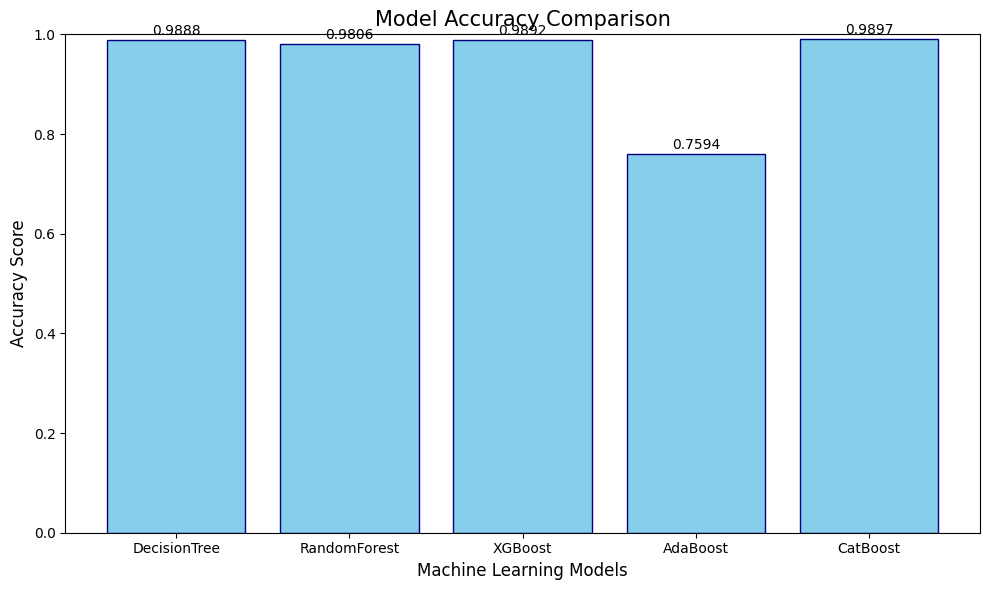

In [ ]:
# prompt: make me a gridsearch cv and check between decision tree, svm, random forest, xgboost, adaboost, cat boost, to check which algorithm works the best by the accuracy score  for new_x and new_y
!pip install --quiet xgboost
!pip install --quiet catboost
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
le = LabelEncoder()
# Define the models and their parameter grids
models = {
    'DecisionTree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }),
    'XGBoost': (XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'CatBoost': (CatBoostClassifier(verbose=0), { # Set verbose to 0 to suppress output
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 6, 8]
    })
}

# best_model = None
# best_accuracy = 0

# for model_name, (model, param_grid) in models.items():
#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
#     # grid_search.fit(X_train, y_train)

#     # Apply Label Encoding only for XGBoost
#     if model_name == 'XGBoost':
#         # Fit and transform the target variable for XGBoost
#         y_train_encoded = le.fit_transform(y_train)
#         y_test_encoded = le.transform(y_test)
#         grid_search.fit(X_train, y_train_encoded)
#         y_pred = grid_search.predict(X_test)
#         accuracy = accuracy_score(y_test_encoded, y_pred)  # Evaluate with encoded labels
#     else:
#         grid_search.fit(X_train, y_train)
#         y_pred = grid_search.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)

#     print(f"{model_name} Accuracy: {accuracy}")

#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = grid_search.best_estimator_

# print(f"Best Model: {best_model.__class__.__name__}")
# print(f"Best Hyperparameters: {best_model.get_params()}")
# print(f"Best Accuracy: {best_accuracy}")

# Collect model names and accuracies
model_names = []
model_accuracies = []
best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    # Apply Label Encoding only for XGBoost
    if model_name == 'XGBoost':
        # Fit and transform the target variable for XGBoost
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        grid_search.fit(X_train, y_train_encoded)
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)  # Evaluate with encoded labels
    else:
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

    # print(f"{model_name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_
    print(f"{model_name} Accuracy: {accuracy}, Best Parameters = {grid_search.best_params_}")
    model_names.append(model_name)
    model_accuracies.append(accuracy)
    # if accuracy > best_accuracy:
    #     best_accuracy = accuracy
    #     best_model = grid_search.best_estimator_

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Hyperparameters: {best_model.get_params()}")
print(f"Best Accuracy: {best_accuracy}")
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color='skyblue', edgecolor='navy')
plt.title('Model Accuracy Comparison', fontsize=15)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Add accuracy values on top of each bar
for i, v in enumerate(model_accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Trying out the predictions

In [ ]:
# prompt: now give me the code to try this out where the user the gives the names of the drivers and their grid position to ultimately find there positions between 1 to 20, use the model that we made by predicting X_train and y_train  from the new_X and new_Y

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assuming 'formula_1', 'df_drivers', and 'df_circuits' are defined from the previous code.

# # Sample data (replace with your actual data)
# formula_1 = pd.read_csv('formula1.csv')
# df_drivers = pd.read_csv('drivers.csv')
# df_circuits = pd.read_csv('circuits.csv')


new_X = formula_1.loc[:,['prev_position','grid','constructorId','driverId']]
new_Y = formula_1['position']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier_f1 = RandomForestClassifier(random_state=42)
rf_classifier_f1.fit(X_train, y_train)

def predict_positions(drivers, grids, circuit_loc):
    predictions = []
    for driver_name, grid in zip(drivers, grids):
        try:
            driver_id = df_drivers[df_drivers['Name'] == driver_name]['driverId'].iloc[0]
            circuit_id = df_circuits[df_circuits['location'] == circuit_loc]['circuitId'].iloc[0]
            # Find the most recent constructorId for the driver
            constructor_id = formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['constructorId'].iloc[0]

            # Prepare input features for prediction
            input_data = pd.DataFrame({
              'prev_position': [formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['prev_position'].iloc[0]],
              'grid': [grid],
              'constructorId': [constructor_id],
              'driverId': [driver_id]
            })

            # Make prediction using the trained model
            predicted_position = rf_classifier_f1.predict(input_data)[0]
            predictions.append({
                'Driver Name': driver_name,
                'Grid': grid,
                'Predicted Position': predicted_position
            })
        except IndexError:
            print(f"Driver {driver_name} not found or insufficient data.")
    return predictions

# Example Usage (Replace with your actual driver names, grid positions and circuit)
drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']

grids = list(range(1, 21))  # Example grid positions
circuit_location = 'Sakhir'  # Replace with actual circuit name

predicted_positions = predict_positions(drivers, grids, circuit_location)
predicted_positions

[{'Driver Name': 'Max Verstappen', 'Grid': 1, 'Predicted Position': 2},
 {'Driver Name': 'Charles Leclerc', 'Grid': 2, 'Predicted Position': 14},
 {'Driver Name': 'George Russell', 'Grid': 3, 'Predicted Position': 1},
 {'Driver Name': 'Carlos Sainz', 'Grid': 4, 'Predicted Position': 5},
 {'Driver Name': 'Sergio Pérez', 'Grid': 5, 'Predicted Position': 15},
 {'Driver Name': 'Fernando Alonso', 'Grid': 6, 'Predicted Position': 8},
 {'Driver Name': 'Lando Norris', 'Grid': 7, 'Predicted Position': 3},
 {'Driver Name': 'Oscar Piastri', 'Grid': 8, 'Predicted Position': 4},
 {'Driver Name': 'Lewis Hamilton', 'Grid': 9, 'Predicted Position': 1},
 {'Driver Name': 'Nico Hülkenberg', 'Grid': 10, 'Predicted Position': 6},
 {'Driver Name': 'Yuki Tsunoda', 'Grid': 11, 'Predicted Position': 10},
 {'Driver Name': 'Lance Stroll', 'Grid': 12, 'Predicted Position': 7},
 {'Driver Name': 'Alexander Albon', 'Grid': 13, 'Predicted Position': 9},
 {'Driver Name': 'Daniel Ricciardo', 'Grid': 14, 'Predicted Posi

In [ ]:
# prompt: how to sort a predicted_positions by the key 'Predicted Position' in ascending order

# Sort the predicted_positions list by the 'Predicted Position' key in ascending order
predicted_positions_sorted = sorted(predicted_positions, key=lambda x: x['Predicted Position'])

predicted_positions_sorted

[{'Driver Name': 'George Russell', 'Grid': 3, 'Predicted Position': 1},
 {'Driver Name': 'Lewis Hamilton', 'Grid': 9, 'Predicted Position': 1},
 {'Driver Name': 'Max Verstappen', 'Grid': 1, 'Predicted Position': 2},
 {'Driver Name': 'Lando Norris', 'Grid': 7, 'Predicted Position': 3},
 {'Driver Name': 'Oscar Piastri', 'Grid': 8, 'Predicted Position': 4},
 {'Driver Name': 'Carlos Sainz', 'Grid': 4, 'Predicted Position': 5},
 {'Driver Name': 'Nico Hülkenberg', 'Grid': 10, 'Predicted Position': 6},
 {'Driver Name': 'Lance Stroll', 'Grid': 12, 'Predicted Position': 7},
 {'Driver Name': 'Fernando Alonso', 'Grid': 6, 'Predicted Position': 8},
 {'Driver Name': 'Alexander Albon', 'Grid': 13, 'Predicted Position': 9},
 {'Driver Name': 'Yuki Tsunoda', 'Grid': 11, 'Predicted Position': 10},
 {'Driver Name': 'Pierre Gasly', 'Grid': 19, 'Predicted Position': 10},
 {'Driver Name': 'Logan Sargeant', 'Grid': 17, 'Predicted Position': 11},
 {'Driver Name': 'Kevin Magnussen', 'Grid': 15, 'Predicted Posi

running the accuracy for 'driverId', 'constructorId', 'grid', 'circuitId', 'Length', 'Turns',
       'Constructor Experience', 'Driver Experience', 'prev_position' in X dataset and 'position' in Y dataset

In [ ]:
new_X_2 = formula_1.drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId','laps','Driver Age','Driver Constructor Experience','DNF Score','Driver Wins','Constructor Wins'], axis=1)
new_y_2 = formula_1['position']  # target variable
new_X_2.columns

Index(['driverId', 'constructorId', 'grid', 'circuitId', 'Length', 'Turns',
       'Constructor Experience', 'Driver Experience', 'prev_position'],
      dtype='object')

DecisionTree Accuracy: 0.9862247094274645, Best Parameters = {'max_depth': None, 'min_samples_split': 10}
RandomForest Accuracy: 0.9698665518725785, Best Parameters = {'max_depth': None, 'n_estimators': 200}
XGBoost Accuracy: 0.9896685320705984, Best Parameters = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

AdaBoost Accuracy: 0.6990959965561774, Best Parameters = {'learning_rate': 0.2, 'n_estimators': 200}
CatBoost Accuracy: 0.9896685320705984, Best Parameters = {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}
Best Model: XGBClassifier
Best Hyperparameters: {'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_

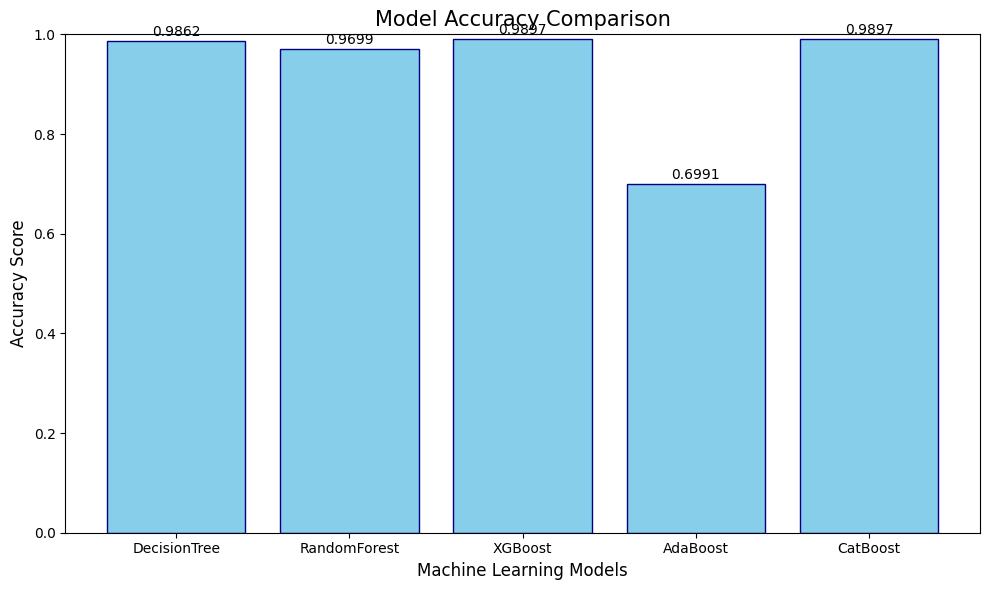

In [ ]:
# prompt: make me a gridsearch cv and check between decision tree, svm, random forest, xgboost, adaboost, cat boost, to check which algorithm works the best by the accuracy score  for new_x and new_y
!pip install --quiet xgboost
!pip install --quiet catboost
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X_2, new_y_2, test_size=0.2, random_state=42)

# Define the models and their parameter grids
models = {
    'DecisionTree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }),
    'XGBoost': (XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    'AdaBoost': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'CatBoost': (CatBoostClassifier(verbose=0), { # Set verbose to 0 to suppress output
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 6, 8]
    })
}

# Collect model names and accuracies
model_names = []
model_accuracies = []
best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    # Apply Label Encoding only for XGBoost
    if model_name == 'XGBoost':
        # Fit and transform the target variable for XGBoost
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        grid_search.fit(X_train, y_train_encoded)
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)  # Evaluate with encoded labels
    else:
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

    # print(f"{model_name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_
    print(f"{model_name} Accuracy: {accuracy}, Best Parameters = {grid_search.best_params_}")
    model_names.append(model_name)
    model_accuracies.append(accuracy)
    # if accuracy > best_accuracy:
    #     best_accuracy = accuracy
    #     best_model = grid_search.best_estimator_

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Hyperparameters: {best_model.get_params()}")
print(f"Best Accuracy: {best_accuracy}")
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color='skyblue', edgecolor='navy')
plt.title('Model Accuracy Comparison', fontsize=15)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)  # Set y-axis from 0 to 1

# Add accuracy values on top of each bar
for i, v in enumerate(model_accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# prompt: save df_circuits and df_drivers and formula_1 dataframe in a csv file

df_circuits.to_csv('df_circuits_result.csv', index=False)
df_drivers.to_csv('df_drivers_result.csv', index=False)
formula_1.to_csv('formula_1_result.csv', index=False)

In [ ]:
formula_1 = pd.read_csv('/content/formula_1_result.csv')
df_circuits = pd.read_csv('/content/df_circuits_result.csv')
df_drivers = pd.read_csv('/content/df_drivers_result.csv')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the pipeline
formula1_predict = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))  # Use RandomForestClassifier with n_estimators=50
])

# Fit the pipeline on the training data
formula1_predict.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = formula1_predict.predict(X_test)

# Model Evaluation

Evaluate the performance of your model using appropriate metrics. This could be accuracy, precision, recall, F1 score, etc., depending on your problem statement.

In [ ]:
# Accuracy and Cross Validation Scores
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_cv = cross_val_score(formula1_predict, X, y, cv=5)

print(f"Accuracy of the Random Forest Classifier: {rfc_accuracy*100:.2f}%")
print(f"Average cross-validation score: {rfc_cv.mean()*100:.2f}%")

Accuracy of the Random Forest Classifier: 99.78%
Average cross-validation score: 99.69%


# Model Deployment
If your model's performance is satisfactory, deploy the model. This could involve integrating the model with a web application, setting up a REST API, etc.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X_2, new_y_2, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model -- the best model taken
model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XGBoost Model Accuracy: {accuracy}")

# Save the model using booster.save_model()
model.save_model('XGBoost_model_with_CircuitId.xgb')

# Optional: Load and verify the model
booster = xgb.Booster()
booster.load_model('XGBoost_model_with_CircuitId.xgb')

# If you need to create a new XGBClassifier with the loaded model
loaded_model = XGBClassifier()
loaded_model.load_model('XGBoost_model_with_CircuitId.xgb')

# Verify loaded model performance
loaded_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test_encoded, loaded_pred)
print(f"Loaded Model Accuracy: {loaded_accuracy}")

XGBoost Model Accuracy: 0.9896685320705984
Loaded Model Accuracy: 0.9896685320705984


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[18:33:49] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.



In [ ]:
from joblib import dump

dump(formula1_predict, 'formula1_model.joblib')

['formula1_model.joblib']

# Try It Out
Enter Driver Name, Circuit Location (e.g., 'Sakhir' or 'Shanghai'), and Grid Position of driver to find out which  position he finishes at.

In [ ]:
# prompt: use the xgboost_model_with_circuitID to predict the player positions after giving the driver names, the grid position list, and the circuit name

import pandas as pd
from joblib import load
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
# Load the saved model
# xgboost_model_with_circuitID = load('XGBoost_model_with_CircuitId')
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('XGBoost_model_with_CircuitId.xgb')
# Load necessary data (replace with your actual file paths)
formula_1 = pd.read_csv('/content/formula_1_result.csv')
df_circuits = pd.read_csv('/content/df_circuits_result.csv')
df_drivers = pd.read_csv('/content/df_drivers_result.csv')

# Initialize LabelEncoder
le = LabelEncoder()
le.fit(formula_1['position'])

def predict_positions_new_model(drivers, grids, circuit_loc):
    predictions = []
    for driver_name, grid in zip(drivers, grids):
        try:
            driver_id = df_drivers[df_drivers['Name'] == driver_name]['driverId'].iloc[0]
            circuit_id = df_circuits[df_circuits['location'] == circuit_loc]['circuitId'].iloc[0]
            # Find the most recent constructorId for the driver
            constructor_id = formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['constructorId'].iloc[0]

            # Prepare input features for prediction
            input_data = pd.DataFrame({
                'driverId': [driver_id],
                'constructorId': [constructor_id],
                'grid': [grid],
                'circuitId': [circuit_id],
                'Length': [df_circuits[df_circuits['circuitId'] == circuit_id]['Length'].iloc[0]],
                'Turns': [df_circuits[df_circuits['circuitId'] == circuit_id]['Turns'].iloc[0]],
                'Constructor Experience': [formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['Constructor Experience'].iloc[0]],
                'Driver Experience': [formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['Driver Experience'].iloc[0]],
                'prev_position': [formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['prev_position'].iloc[0]],
            })

            # Get predicted probabilities for all positions
            predicted_probs = loaded_model.predict_proba(input_data)[0]

            # # Find the position with the highest probability (considering ties)
            predicted_position = np.argmax(predicted_probs)
            # # Adjust to ensure the position starts from 1
            predicted_position += 1
            # Make prediction using the trained model
            predictions.append({
                'Driver Name': driver_name,
                'Grid': grid,
                'Predicted Position': predicted_position,
                'Probability': predicted_probs[predicted_position - 1]  # Store probability
            })
        except IndexError:
            print(f"Driver {driver_name} not found or insufficient data.")
    return predictions

# Example usage (replace with your actual data)
drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']

grids = list(range(1, 21))
circuit_location = 'Melbourne'

predicted_positions = predict_positions_new_model(drivers, grids, circuit_location)
predicted_positions
predicted_positions_sorted = sorted(predicted_positions, key=lambda x: x['Predicted Position'])

predicted_positions_sorted

[{'Driver Name': 'George Russell',
  'Grid': 3,
  'Predicted Position': 1,
  'Probability': 0.29405516},
 {'Driver Name': 'Lewis Hamilton',
  'Grid': 9,
  'Predicted Position': 1,
  'Probability': 0.29405516},
 {'Driver Name': 'Max Verstappen',
  'Grid': 1,
  'Predicted Position': 2,
  'Probability': 0.29445666},
 {'Driver Name': 'Lando Norris',
  'Grid': 7,
  'Predicted Position': 3,
  'Probability': 0.29495233},
 {'Driver Name': 'Oscar Piastri',
  'Grid': 8,
  'Predicted Position': 4,
  'Probability': 0.29497245},
 {'Driver Name': 'Carlos Sainz',
  'Grid': 4,
  'Predicted Position': 5,
  'Probability': 0.2949833},
 {'Driver Name': 'Nico Hülkenberg',
  'Grid': 10,
  'Predicted Position': 6,
  'Probability': 0.2938974},
 {'Driver Name': 'Lance Stroll',
  'Grid': 12,
  'Predicted Position': 7,
  'Probability': 0.29455626},
 {'Driver Name': 'Fernando Alonso',
  'Grid': 6,
  'Predicted Position': 8,
  'Probability': 0.29294616},
 {'Driver Name': 'Alexander Albon',
  'Grid': 13,
  'Predict

In [ ]:
def prediction(driver_name, grid, circuit_loc):
    driver = df_drivers.loc[df_drivers['Name']==driver_name, 'driverId'].iloc[0]
    circuit = df_circuits.loc[df_circuits['location']==circuit_loc, ['circuitId', 'laps']].iloc[0]

    input_data = formula_1[formula_1['driverId'] == driver].sort_values(by='date', ascending=False).iloc[0]
    circuit_data = df_circuits[df_circuits['location']==circuit_loc].iloc[0]

    features = {
        'driverId': input_data['driverId'],
        'constructorId': input_data['constructorId'],
        'grid': grid,
        'laps': circuit_data['laps'],
        'circuitId': circuit_data['circuitId'],
        'Length': circuit_data['Length'],
        'Turns': circuit_data['Turns'],
        'Constructor Experience': input_data['Constructor Experience'],
        'Driver Experience': input_data['Driver Experience'],
        'Driver Age': input_data['Driver Age'],
        'Driver Wins': input_data['Driver Wins'],
        'Constructor Wins': input_data['Constructor Wins'],
        'Driver Constructor Experience': input_data['Driver Constructor Experience'],
        'DNF Score': input_data['DNF Score'],
        'prev_position': input_data['prev_position']
    }
    features = pd.DataFrame([features])
    #print(features)

    return formula1_predict.predict(features), formula1_predict.predict_proba(features)

Enter Name of driver in order of their grid position
Enter Circuit Location (for e.g., Sakhir) (and also for podium positions only)

In [ ]:
# Drivers is the list of driver in the race, sorted by their grid position
drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']

# Grids is a list of grid positions from your table
grids = list(range(1, 21))

# Location of circuit
circuit_loc = 'Sakhir'

predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    if pred in [1, 2, 3]:
        predictions.append({
        'Driver Name ': driver_name,
        'Grid': grid,
        'Prediction': pred,
        'Probability': np.max(prob)
        })
    #print(f'{driver_name}, {grid}, {pred}, prob: {prob}')

predictions

[{'Driver Name ': 'Max Verstappen',
  'Grid': 1,
  'Prediction': array([2]),
  'Probability': 0.76},
 {'Driver Name ': 'George Russell',
  'Grid': 3,
  'Prediction': array([1]),
  'Probability': 0.7},
 {'Driver Name ': 'Lando Norris',
  'Grid': 7,
  'Prediction': array([3]),
  'Probability': 0.7},
 {'Driver Name ': 'Lewis Hamilton',
  'Grid': 9,
  'Prediction': array([1]),
  'Probability': 0.46}]

#Anugraha's addition

In [ ]:
sorted(new_Y.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
# prompt: using new_X and new_Y, give me the code for a predicting random forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming new_X and new_Y are defined as in the provided code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier_f1 = RandomForestClassifier(random_state=42)
rf_classifier_f1.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_f1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

Accuracy of the Random Forest model: 0.9793370641411967


# new new anugraha

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X_2, new_y_2, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier_f1_2 = RandomForestClassifier(random_state=42)
rf_classifier_f1_2.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_f1_2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

Accuracy of the Random Forest model: 0.9668532070598365


In [ ]:
# prompt: now give me the code to try this out where the user the gives the names of the drivers and their grid position to ultimately find there positions between 1 to 20, use the model that we made by predicting X_train and y_train  from the new_X_2 and new_y_2

def predict_positions_new_model(drivers, grids, circuit_loc):
    predictions = []
    for driver_name, grid in zip(drivers, grids):
        try:
            driver_id = df_drivers[df_drivers['Name'] == driver_name]['driverId'].iloc[0]
            circuit_id = df_circuits[df_circuits['location'] == circuit_loc]['circuitId'].iloc[0]
            # Find the most recent constructorId for the driver
            constructor_id = formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['constructorId'].iloc[0]

            # Prepare input features for prediction
            input_data = pd.DataFrame({
                'driverId': [driver_id],
                'constructorId': [constructor_id],
                'grid': [grid],
                'circuitId': [circuit_id],
                'Length': [df_circuits[df_circuits['circuitId'] == circuit_id]['Length'].iloc[0]],
                'Turns': [df_circuits[df_circuits['circuitId'] == circuit_id]['Turns'].iloc[0]],
                'Constructor Experience': [formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['Constructor Experience'].iloc[0]],
                'Driver Experience': [formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['Driver Experience'].iloc[0]],
                'prev_position': [formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)['prev_position'].iloc[0]],
            })

            # Make prediction using the trained model
            predicted_position = rf_classifier_f1_2.predict(input_data)[0]
            predictions.append({
                'Driver Name': driver_name,
                'Grid': grid,
                'Predicted Position': predicted_position
            })
        except IndexError:
            print(f"Driver {driver_name} not found or insufficient data.")
    return predictions

# Example usage (replace with your actual data)
drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']

grids = list(range(1, 21))
circuit_location = 'Sakhir'

predicted_positions = predict_positions_new_model(drivers, grids, circuit_location)
predicted_positions
predicted_positions_sorted = sorted(predicted_positions, key=lambda x: x['Predicted Position'])

predicted_positions_sorted

[{'Driver Name': 'George Russell', 'Grid': 3, 'Predicted Position': 1},
 {'Driver Name': 'Lewis Hamilton', 'Grid': 9, 'Predicted Position': 1},
 {'Driver Name': 'Max Verstappen', 'Grid': 1, 'Predicted Position': 2},
 {'Driver Name': 'Lando Norris', 'Grid': 7, 'Predicted Position': 3},
 {'Driver Name': 'Oscar Piastri', 'Grid': 8, 'Predicted Position': 4},
 {'Driver Name': 'Charles Leclerc', 'Grid': 2, 'Predicted Position': 5},
 {'Driver Name': 'Carlos Sainz', 'Grid': 4, 'Predicted Position': 5},
 {'Driver Name': 'Nico Hülkenberg', 'Grid': 10, 'Predicted Position': 6},
 {'Driver Name': 'Lance Stroll', 'Grid': 12, 'Predicted Position': 7},
 {'Driver Name': 'Fernando Alonso', 'Grid': 6, 'Predicted Position': 8},
 {'Driver Name': 'Alexander Albon', 'Grid': 13, 'Predicted Position': 9},
 {'Driver Name': 'Yuki Tsunoda', 'Grid': 11, 'Predicted Position': 10},
 {'Driver Name': 'Pierre Gasly', 'Grid': 19, 'Predicted Position': 10},
 {'Driver Name': 'Logan Sargeant', 'Grid': 17, 'Predicted Positi

In [ ]:
df_drivers

,driverId,code,dob,nationality,Name
0,1,HAM,1985-01-07,British,Lewis Hamilton
1,2,HEI,1977-05-10,German,Nick Heidfeld
2,3,ROS,1985-06-27,German,Nico Rosberg
3,4,ALO,1981-07-29,Spanish,Fernando Alonso
4,5,KOV,1981-10-19,Finnish,Heikki Kovalainen
...,...,...,...,...,...
854,856,DEV,1995-02-06,Dutch,Nyck de Vries
855,857,PIA,2001-04-06,Australian,Oscar Piastri
856,858,SAR,2000-12-31,American,Logan Sargeant
857,859,LAW,2002-02-11,New Zealander,Liam Lawson


In [ ]:
df_circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns,laps
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,5.278,14,57
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,5.543,15,55
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0,http://en.wikipedia.org/wiki/Bahrain_Internati...,5.412,15,56
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,4.657,14,65
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0,http://en.wikipedia.org/wiki/Istanbul_Park,5.338,14,57
...,...,...,...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108.0,http://en.wikipedia.org/wiki/Algarve_Internati...,4.653,15,65
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255.0,http://en.wikipedia.org/wiki/Mugello_Circuit,5.245,15,58
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15.0,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,6.174,27,49
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12.0,http://en.wikipedia.org/wiki/Losail_Internatio...,5.419,16,56


In [ ]:
formula_1

,raceId,driverId,constructorId,grid,position,laps,seconds,fastestLapSpeed,date,circuitId,...,Turns,Constructor Experience,Driver Experience,Driver Age,Driver Wins,Constructor Wins,Driver Constructor Experience,DNF Score,prev_position,podium
1483,36,1,1,4,3,58,5147.365,221.083,2007-03-18,1,...,14,1211,1,22,0,151.0,1,0.50,3.0,3
1567,37,1,1,4,2,56,5552.487,206.355,2007-04-08,2,...,15,1213,2,22,0,151.0,2,0.51,2.0,2
1655,38,1,1,2,2,57,5609.875,206.674,2007-04-15,3,...,15,1215,3,22,0,151.0,3,0.51,2.0,2
1743,39,1,1,4,2,65,5503.020,202.205,2007-05-13,4,...,14,1217,4,22,0,151.0,4,0.51,2.0,2
1831,40,1,1,2,2,78,6033.424,159.528,2007-05-27,6,...,19,1219,5,22,0,151.0,5,0.51,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126739,1112,859,213,12,11,51,4491.781,242.944,2023-09-03,14,...,11,150,2,21,0,0.0,2,0.52,11.0,0
1126811,1113,859,213,10,9,62,6463.336,179.585,2023-09-17,15,...,19,152,3,21,0,0.0,3,0.52,9.0,0
1126899,1114,859,213,11,11,52,0.000,212.738,2023-09-24,22,...,18,154,4,21,0,0.0,4,0.51,11.0,0
1127003,1115,859,213,17,17,56,0.000,223.943,2023-10-08,78,...,16,156,5,21,0,0.0,5,0.51,17.0,0


In [ ]:
new_Y.unique()

array([ 3,  2,  1,  9,  5,  4,  7, 13, 10, 12,  6, 16, 18, 14,  8, 19, 15,
       11, 17, 20])

In [ ]:
# prompt: make me a gridsearch cv and check between decision tree, svm, random forest, xgboost, adaboost, cat boost, to check which algorithm works the best by the accuracy score  for new_x and new_y (also print the accuracy of each model along with its best hyperparameters)
!pip install --quiet catboost
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
le = LabelEncoder()

param_grids = {
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBClassifier': {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 1.0]
    },
    'CatBoostClassifier': {
        'iterations': [50, 100],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 6]
    }
}

# Initialize models
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),

    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'CatBoostClassifier': CatBoostClassifier(random_seed=42, verbose=1)
}


results = {}
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
    # Apply Label Encoding only for XGBoost
    if model_name == 'XGBClassifier':
        # Fit and transform the target variable for XGBoost
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        grid_search.fit(X_train, y_train_encoded)
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test_encoded, y_pred)  # Evaluate with encoded labels
    else:
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'best_params': grid_search.best_params_
    }
    print(f'{model_name}: Accuracy = {accuracy:.4f}, Best Parameters = {grid_search.best_params_}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid_search.best_estimator_

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Hyperparameters: {best_model.get_params()}")
print(f"Best Accuracy: {best_accuracy}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00
DecisionTreeClassifier: Accuracy = 0.9888, Best Parameters = {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
RandomForestClassifier: Accuracy = 0.9824, Best Parameters = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:20:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:20:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:20:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:20:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:20:19] WARNING: /workspace

XGBClassifier: Accuracy = 0.9897, Best Parameters = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: Fu

AdaBoostClassifier: Accuracy = 0.7594, Best Parameters = {'learning_rate': 0.1, 'n_estimators': 100}
0:	learn: 2.9468702	total: 63.3ms	remaining: 3.1s
1:	learn: 2.9007478	total: 76.8ms	remaining: 1.84s
2:	learn: 2.8593769	total: 89.6ms	remaining: 1.4s
3:	learn: 2.8182541	total: 102ms	remaining: 1.18s
4:	learn: 2.7804610	total: 115ms	remaining: 1.04s
5:	learn: 2.7451289	total: 128ms	remaining: 939ms
6:	learn: 2.7087648	total: 141ms	remaining: 868ms
7:	learn: 2.6750161	total: 155ms	remaining: 811ms
8:	learn: 2.6432698	total: 168ms	remaining: 763ms
9:	learn: 2.6114094	total: 183ms	remaining: 733ms
10:	learn: 2.5848854	total: 196ms	remaining: 697ms
11:	learn: 2.5620392	total: 211ms	remaining: 669ms
12:	learn: 2.5347647	total: 225ms	remaining: 641ms
13:	learn: 2.5097307	total: 240ms	remaining: 616ms
14:	learn: 2.4861019	total: 253ms	remaining: 591ms
15:	learn: 2.4625012	total: 268ms	remaining: 570ms
16:	learn: 2.4421348	total: 284ms	remaining: 551ms
17:	learn: 2.4127576	total: 299ms	remaini

In [ ]:
!pip install --quiet xgboost
!pip install --quiet catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
formula_1.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'position', 'laps',
       'seconds', 'fastestLapSpeed', 'date', 'circuitId', 'Length', 'Turns',
       'Constructor Experience', 'Driver Experience', 'Driver Age',
       'Driver Wins', 'Constructor Wins', 'Driver Constructor Experience',
       'DNF Score', 'prev_position', 'podium'],
      dtype='object')

In [ ]:
df_drivers.columns

Index(['driverId', 'code', 'dob', 'nationality', 'Name'], dtype='object')

In [ ]:
df_circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns,laps
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,5.278,14,57
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,5.543,15,55
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0,http://en.wikipedia.org/wiki/Bahrain_Internati...,5.412,15,56
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,4.657,14,65
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0,http://en.wikipedia.org/wiki/Istanbul_Park,5.338,14,57
...,...,...,...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108.0,http://en.wikipedia.org/wiki/Algarve_Internati...,4.653,15,65
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255.0,http://en.wikipedia.org/wiki/Mugello_Circuit,5.245,15,58
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15.0,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,6.174,27,49
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12.0,http://en.wikipedia.org/wiki/Losail_Internatio...,5.419,16,56


In [ ]:
# prompt: make a functions that returns the drivers who have raced in a specific circuit
# do this for all circuits -- name and location

def drivers_per_circuit(df_circuits, formula_1):
    """
    Returns a dictionary where keys are circuit names and locations,
    and values are lists of drivers who have raced in that circuit.
    """
    circuit_data = {}

    for index, row in df_circuits.iterrows():
        circuit_id = row['circuitId']
        circuit_name = row['name']
        circuit_location = row['location']

        # Find all races held at this circuit
        races_at_circuit = formula_1[formula_1['circuitId'] == circuit_id]

        # Get unique driver IDs for those races
        drivers_in_circuit = races_at_circuit['driverId'].unique()

        # Convert driver IDs to driver names using df_drivers
        driver_names = []
        for driver_id in drivers_in_circuit:
            driver_name = df_drivers[df_drivers['driverId'] == driver_id]['Name'].iloc[0]
            driver_names.append(driver_name)

        circuit_data[(circuit_name, circuit_location)] = driver_names

    return circuit_data

# Example usage (assuming df_circuits and formula_1 DataFrames are loaded)
circuit_drivers = drivers_per_circuit(df_circuits, formula_1)

# Print the information for each circuit
for (circuit_name, circuit_location), drivers in circuit_drivers.items():
    print(f"Circuit: {circuit_name}, Location: {circuit_location}")
    print("Drivers:", drivers)
    print("-" * 20)

Circuit: Albert Park Grand Prix Circuit, Location: Melbourne
Drivers: ['Lewis Hamilton', 'Nick Heidfeld', 'Nico Rosberg', 'Fernando Alonso', 'Heikki Kovalainen', 'Kazuki Nakajima', 'Sébastien Bourdais', 'Kimi Räikkönen', 'Robert Kubica', 'Timo Glock', 'Takuma Sato', 'Felipe Massa', 'David Coulthard', 'Jarno Trulli', 'Adrian Sutil', 'Mark Webber', 'Jenson Button', 'Anthony Davidson', 'Sebastian Vettel', 'Giancarlo Fisichella', 'Rubens Barrichello', 'Ralf Schumacher', 'Vitantonio Liuzzi', 'Alexander Wurz', 'Scott Speed', 'Christijan Albers', 'Michael Schumacher', 'Juan Pablo Montoya', 'Christian Klien', 'Tiago Monteiro', 'Yuji Ide', 'Jacques Villeneuve', 'Pedro de la Rosa', 'Narain Karthikeyan', 'Patrick Friesacher', 'Ricardo Zonta', 'Cristiano da Matta', 'Olivier Panis', 'Giorgio Pantano', 'Marc Gené', 'Heinz-Harald Frentzen', 'Jos Verstappen', 'Luciano Burti', 'Jean Alesi', 'Eddie Irvine', 'Mika Häkkinen', 'Alex Yoong', 'Mika Salo', 'Pedro Diniz', 'Johnny Herbert', 'Sébastien Buemi', '

In [ ]:
# prompt: make a functions that returns the drivers who have raced in a specific circuit
# do this for all circuits

def drivers_per_circuit(formula_1, df_circuits, df_drivers):
  """
  Returns a dictionary where keys are circuit names and values are lists of drivers who raced there.

  Args:
    formula_1: DataFrame containing race results.
    df_circuits: DataFrame containing circuit information.
    df_drivers: DataFrame containing driver information.

  Returns:
    A dictionary mapping circuit names to lists of driver names.
  """

  circuit_drivers = {}
  for circuit_name in df_circuits['name'].unique():
    circuit_races = formula_1[formula_1['circuitId'].isin(df_circuits[df_circuits['name'] == circuit_name]['circuitId'])]
    drivers_in_circuit = []
    for driver_id in circuit_races['driverId'].unique():
        driver_name = df_drivers[df_drivers['driverId'] == driver_id]['Name'].iloc[0]
        drivers_in_circuit.append(driver_name)
    circuit_drivers[circuit_name] = drivers_in_circuit
  return circuit_drivers

# Example usage (assuming your DataFrames are named formula_1, df_circuits, and df_drivers):
driver_circuit_dict = drivers_per_circuit(formula_1, df_circuits, df_drivers)
driver_circuit_dict

{'Albert Park Grand Prix Circuit': ['Lewis Hamilton',
  'Nick Heidfeld',
  'Nico Rosberg',
  'Fernando Alonso',
  'Heikki Kovalainen',
  'Kazuki Nakajima',
  'Sébastien Bourdais',
  'Kimi Räikkönen',
  'Robert Kubica',
  'Timo Glock',
  'Takuma Sato',
  'Felipe Massa',
  'David Coulthard',
  'Jarno Trulli',
  'Adrian Sutil',
  'Mark Webber',
  'Jenson Button',
  'Anthony Davidson',
  'Sebastian Vettel',
  'Giancarlo Fisichella',
  'Rubens Barrichello',
  'Ralf Schumacher',
  'Vitantonio Liuzzi',
  'Alexander Wurz',
  'Scott Speed',
  'Christijan Albers',
  'Michael Schumacher',
  'Juan Pablo Montoya',
  'Christian Klien',
  'Tiago Monteiro',
  'Yuji Ide',
  'Jacques Villeneuve',
  'Pedro de la Rosa',
  'Narain Karthikeyan',
  'Patrick Friesacher',
  'Ricardo Zonta',
  'Cristiano da Matta',
  'Olivier Panis',
  'Giorgio Pantano',
  'Marc Gené',
  'Heinz-Harald Frentzen',
  'Jos Verstappen',
  'Luciano Burti',
  'Jean Alesi',
  'Eddie Irvine',
  'Mika Häkkinen',
  'Alex Yoong',
  'Mika S

#Hyper parameter testing

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [ ]:
new_X_2 = formula_1.drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId','laps','Driver Age','Driver Constructor Experience','DNF Score','Driver Wins','Constructor Wins'], axis=1)
new_y_2 = formula_1['position']  # target variable
new_X_2.columns

Index(['driverId', 'constructorId', 'grid', 'circuitId', 'Length', 'Turns',
       'Constructor Experience', 'Driver Experience', 'prev_position'],
      dtype='object')

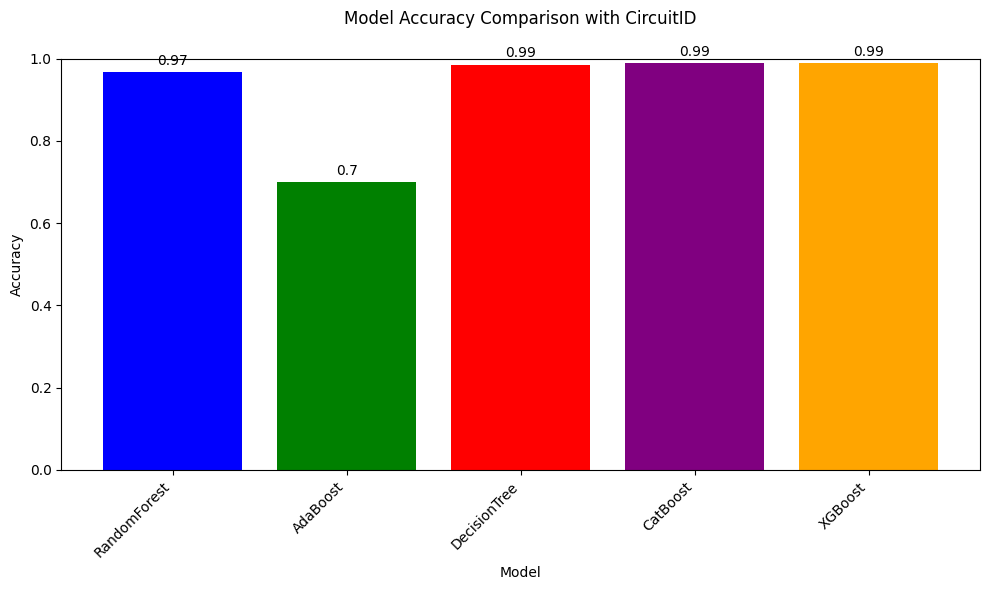

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding accuracies
models = ['RandomForest', 'AdaBoost', 'DecisionTree', 'CatBoost', 'XGBoost']
accuracies = [0.9672836848902282, 0.6990959965561774, 0.9857942315970728, 0.9896685320705984, 0.9896685320705984]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Accuracy Comparison with CircuitID', pad = 25)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: now make a XGBoost model with the Parameters = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50} to be trained on new_X_2, new_y_2, and then saved using the name 'XGBoost_model_with_CircuitId'

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X_2, new_y_2, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XGBoost Model Accuracy: {accuracy}")

# Save the model
dump(model, 'XGBoost_model_with_CircuitId.pkl')

XGBoost Model Accuracy: 0.9896685320705984


['XGBoost_model_with_CircuitId.pkl']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle  # Using pickle instead of joblib
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_X_2, new_y_2, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"XGBoost Model Accuracy: {accuracy}")

# Save the model in .pkl format
with open('XGBoost_model_with_CircuitId.pkl', 'wb') as file:
    pickle.dump(model, file)

# Optional: Verify model can be loaded
with open('XGBoost_model_with_CircuitId.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Verify loaded model performance
loaded_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test_encoded, loaded_pred)
print(f"Loaded Model Accuracy: {loaded_accuracy}")

XGBoost Model Accuracy: 0.9896685320705984
Loaded Model Accuracy: 0.9896685320705984


In [ ]:
# prompt: how to get predict_proba for the xgb model file

import xgboost as xgb
import pickle
from sklearn.metrics import accuracy_score

# Load the saved XGBoost model
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('XGBoost_model_with_CircuitId.xgb')

# Assuming X_test is defined and available
# ... (your code for data loading and preprocessing)

# Get predicted probabilities
y_pred_proba = loaded_model.predict_proba(X_test)

y_pred_proba

array([[0.03710506, 0.03710607, 0.0371073 , ..., 0.03710443, 0.03712878,
        0.03710406],
       [0.03710506, 0.03710607, 0.0371073 , ..., 0.03710443, 0.03712878,
        0.03710406],
       [0.03715076, 0.03715176, 0.03715299, ..., 0.03715011, 0.0371745 ,
        0.03714974],
       ...,
       [0.03708328, 0.03708429, 0.03708552, ..., 0.03708265, 0.03710699,
        0.03708228],
       [0.03710506, 0.03710607, 0.0371073 , ..., 0.03710443, 0.03712878,
        0.03710406],
       [0.29405516, 0.03754629, 0.03733536, ..., 0.03709053, 0.03711487,
        0.03709016]], dtype=float32)

In [ ]:
drivers=pd.read_csv('/content/df_drivers_result.csv')
sorted(drivers.Name.unique())

['Adolf Brudes',
 'Adolfo Cruz',
 'Adrian Sutil',
 'Adrián Campos',
 'Aguri Suzuki',
 'Al Herman',
 'Al Keller',
 'Al Pease',
 'Alain Prost',
 'Alain de Changy',
 'Alan Brown',
 'Alan Jones',
 'Alan Rees',
 'Alan Rollinson',
 'Alan Stacey',
 'Albert Scherrer',
 'Alberto Ascari',
 'Alberto Colombo',
 'Alberto Crespo',
 'Alberto Rodriguez Larreta',
 'Alberto Uria',
 'Aldo Gordini',
 'Alessandro Nannini',
 'Alessandro Pesenti-Rossi',
 'Alessandro Zanardi',
 'Alessandro de Tomaso',
 'Alex Blignaut',
 'Alex Caffi',
 'Alex Ribeiro',
 'Alex Soler-Roig',
 'Alex Yoong',
 'Alexander Albon',
 'Alexander Rossi',
 'Alexander Wurz',
 'Alfonso Thiele',
 'Alfonso de Portago',
 'Alfredo Pián',
 'Allan McNish',
 'Allen Berg',
 'Andrea Chiesa',
 'Andrea Montermini',
 'Andrea de Adamich',
 'Andrea de Cesaris',
 'André Guelfi',
 'André Lotterer',
 'André Milhoux',
 'André Pilette',
 'André Simon',
 'André Testut',
 'Andy Linden',
 'Andy Sutcliffe',
 'Anthony Davidson',
 'Anthony Foyt',
 'Antonio Creus',
 '

In [ ]:
df_circuits.name.unique()

array(['Albert Park Grand Prix Circuit', 'Sepang International Circuit',
       'Bahrain International Circuit', 'Circuit de Barcelona-Catalunya',
       'Istanbul Park', 'Circuit de Monaco', 'Circuit Gilles Villeneuve',
       'Circuit de Nevers Magny-Cours', 'Silverstone Circuit',
       'Hockenheimring', 'Hungaroring', 'Valencia Street Circuit',
       'Circuit de Spa-Francorchamps', 'Autodromo Nazionale di Monza',
       'Marina Bay Street Circuit', 'Fuji Speedway',
       'Shanghai International Circuit', 'Autódromo José Carlos Pace',
       'Indianapolis Motor Speedway', 'Nürburgring',
       'Autodromo Enzo e Dino Ferrari', 'Suzuka Circuit',
       'Las Vegas Strip Street Circuit', 'Yas Marina Circuit',
       'Autódromo Juan y Oscar Gálvez', 'Circuito de Jerez',
       'Autódromo do Estoril', 'Okayama International Circuit',
       'Adelaide Street Circuit', 'Kyalami', 'Donington Park',
       'Autódromo Hermanos Rodríguez', 'Phoenix street circuit',
       'Circuit Paul Ricard

In [ ]:
# prompt: run if the prediction is working or not for each circuit by running a loop in df_circuits[name]
notworking=[]
working=[]
for circuit in df_circuits['location'].unique():
    # Assuming predict_positions_new_model is defined and works as intended
    # Replace with your actual driver names and grid positions
    drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']

    grids = list(range(1, 21))

    try:
        predictions = predict_positions_new_model(drivers, grids, circuit)
        print(f"Predictions for {circuit}:")
        for pred in predictions:
            print(pred)
        working.append(circuit)
    except Exception as e:
        print(f"Error predicting for {circuit}: {e}")
        notworking.append(circuit)
        continue

Predictions for Melbourne:
{'Driver Name': 'Max Verstappen', 'Grid': 1, 'Predicted Position': 2, 'Probability': 0.29445666}
{'Driver Name': 'Charles Leclerc', 'Grid': 2, 'Predicted Position': 14, 'Probability': 0.29353383}
{'Driver Name': 'George Russell', 'Grid': 3, 'Predicted Position': 1, 'Probability': 0.29405516}
{'Driver Name': 'Carlos Sainz', 'Grid': 4, 'Predicted Position': 5, 'Probability': 0.2949833}
{'Driver Name': 'Sergio Pérez', 'Grid': 5, 'Predicted Position': 17, 'Probability': 0.2924314}
{'Driver Name': 'Fernando Alonso', 'Grid': 6, 'Predicted Position': 8, 'Probability': 0.29294616}
{'Driver Name': 'Lando Norris', 'Grid': 7, 'Predicted Position': 3, 'Probability': 0.29495233}
{'Driver Name': 'Oscar Piastri', 'Grid': 8, 'Predicted Position': 4, 'Probability': 0.29497245}
{'Driver Name': 'Lewis Hamilton', 'Grid': 9, 'Predicted Position': 1, 'Probability': 0.29405516}
{'Driver Name': 'Nico Hülkenberg', 'Grid': 10, 'Predicted Position': 6, 'Probability': 0.2938974}
{'Drive

In [ ]:
formula_1.shape

(11611, 21)

In [ ]:
working

['Melbourne',
 'Kuala Lumpur',
 'Sakhir',
 'Montmeló',
 'Istanbul',
 'Monte-Carlo',
 'Montreal',
 'Magny Cours',
 'Silverstone',
 'Hockenheim',
 'Budapest',
 'Valencia',
 'Spa',
 'Monza',
 'Marina Bay',
 'Oyama',
 'Shanghai',
 'São Paulo',
 'Indianapolis',
 'Nürburg',
 'Imola',
 'Suzuka',
 'Las Vegas',
 'Abu Dhabi',
 'Buenos Aires',
 'Jerez de la Frontera',
 'Estoril',
 'Okayama',
 'Adelaide',
 'Midrand',
 'Castle Donington',
 'Mexico City',
 'Phoenix',
 'Le Castellet',
 'Yeongam County',
 'Rio de Janeiro',
 'Detroit',
 'Kent',
 'Zandvoort',
 'Heusden-Zolder',
 'Dijon',
 'Dallas',
 'California',
 'Nevada',
 'Madrid',
 'New York State',
 'Anderstorp',
 'Ontario',
 'Barcelona',
 'Brussels',
 'Clermont-Ferrand',
 'Quebec',
 'Rouen',
 'Le Mans',
 'Reims',
 'Eastern Cape Province',
 'Styria',
 'Liverpool',
 'Oporto',
 'Berlin',
 'Lisbon',
 'Florida',
 'Casablanca',
 'Pescara',
 'Bern',
 'Uttar Pradesh',
 'Austin',
 'Spielberg',
 'Sochi',
 'Baku',
 'Portimão',
 'Mugello',
 'Jeddah',
 'Al Daa

In [ ]:
notworking

[]

In [ ]:
import pandas as pd
import numpy as np
from joblib import load
from sklearn.preprocessing import LabelEncoder

# Load the saved model
xgboost_model_with_circuitID = load('XGBoost_model_with_CircuitId')

# Load necessary data (replace with your actual file paths)
formula_1 = pd.read_csv('/content/formula_1_result.csv')
df_circuits = pd.read_csv('/content/df_circuits_result.csv')
df_drivers = pd.read_csv('/content/df_drivers_result.csv')

# Initialize LabelEncoder
le = LabelEncoder()
le.fit(formula_1['position'])

def predict_positions_new_model(drivers, grids, circuit_loc):
    predictions = []

    # First, validate circuit exists
    if circuit_loc not in df_circuits['location'].values:
        raise ValueError(f"Circuit location {circuit_loc} not found in dataset")

    circuit_id = df_circuits[df_circuits['location'] == circuit_loc]['circuitId'].iloc[0]
    circuit_length = df_circuits[df_circuits['circuitId'] == circuit_id]['Length'].iloc[0]
    circuit_turns = df_circuits[df_circuits['circuitId'] == circuit_id]['Turns'].iloc[0]

    for driver_name, grid in zip(drivers, grids):
        # Validate driver exists
        driver_rows = df_drivers[df_drivers['Name'] == driver_name]
        if driver_rows.empty:
            raise ValueError(f"Driver {driver_name} not found in dataset")

        driver_id = driver_rows['driverId'].iloc[0]

        # Find driver's recent data
        driver_recent_data = formula_1[formula_1['driverId'] == driver_id].sort_values('date', ascending=False)

        # Validate sufficient recent data
        if driver_recent_data.empty:
            raise ValueError(f"Insufficient data for driver {driver_name}")

        try:
            # Find the most recent constructorId for the driver
            constructor_id = driver_recent_data['constructorId'].iloc[0]

            # Validate constructor experience and driver experience
            constructor_exp = driver_recent_data['Constructor Experience'].iloc[0]
            driver_exp = driver_recent_data['Driver Experience'].iloc[0]
            prev_position = driver_recent_data['prev_position'].iloc[0]

            # Prepare input features for prediction
            input_data = pd.DataFrame({
                'driverId': [driver_id],
                'constructorId': [constructor_id],
                'grid': [grid],
                'circuitId': [circuit_id],
                'Length': [circuit_length],
                'Turns': [circuit_turns],
                'Constructor Experience': [constructor_exp],
                'Driver Experience': [driver_exp],
                'prev_position': [prev_position],
            })

            # Get predicted probabilities for all positions
            predicted_probs = xgboost_model_with_circuitID.predict_proba(input_data)[0]

            # Find the position with the highest probability
            predicted_position = np.argmax(predicted_probs) + 1

            predictions.append({
                'Driver Name': driver_name,
                'Grid': grid,
                'Predicted Position': predicted_position,
                'Probability': predicted_probs[predicted_position - 1]  # Store probability
            })

        except Exception as e:
            raise ValueError(f"Error processing driver {driver_name}: {str(e)}")

    return predictions

# Main prediction loop with strict validation
notworking = []
working = []

# Standard driver and grid list
drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']

grids = list(range(1, 21))

# Iterate through all unique circuit locations
for circuit in df_circuits['name'].unique():
    try:
        # Attempt to predict for all drivers
        predictions = predict_positions_new_model(drivers, grids, circuit)

        print(f"Predictions for {circuit}:")
        for pred in predictions:
            print(pred)

        working.append(circuit)

    except ValueError as e:
        print(f"Error predicting for {circuit}: {e}")
        notworking.append(circuit)
        continue

print("\nWorking Circuits:", working)
print("\nNon-Working Circuits:", notworking)

Error predicting for Albert Park Grand Prix Circuit: Circuit location Albert Park Grand Prix Circuit not found in dataset
Error predicting for Sepang International Circuit: Circuit location Sepang International Circuit not found in dataset
Error predicting for Bahrain International Circuit: Circuit location Bahrain International Circuit not found in dataset
Error predicting for Circuit de Barcelona-Catalunya: Circuit location Circuit de Barcelona-Catalunya not found in dataset
Error predicting for Istanbul Park: Circuit location Istanbul Park not found in dataset
Error predicting for Circuit de Monaco: Circuit location Circuit de Monaco not found in dataset
Error predicting for Circuit Gilles Villeneuve: Circuit location Circuit Gilles Villeneuve not found in dataset
Error predicting for Circuit de Nevers Magny-Cours: Circuit location Circuit de Nevers Magny-Cours not found in dataset
Error predicting for Silverstone Circuit: Circuit location Silverstone Circuit not found in dataset
Er

In [ ]:
df_circuits.loc[:,['circuitId','location']]

,circuitId,location
0,1,Melbourne
1,2,Kuala Lumpur
2,3,Sakhir
3,4,Montmeló
4,5,Istanbul
...,...,...
72,75,Portimão
73,76,Mugello
74,77,Jeddah
75,78,Al Daayen


from matplotlib import pyplot as plt
_df_0['circuitId'].plot(kind='hist', bins=20, title='circuitId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['circuitId'].plot(kind='line', figsize=(8, 4), title='circuitId')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
[df_circuits['location']]

[0        Melbourne
 1     Kuala Lumpur
 2           Sakhir
 3         Montmeló
 4         Istanbul
           ...     
 72        Portimão
 73         Mugello
 74          Jeddah
 75       Al Daayen
 76           Miami
 Name: location, Length: 77, dtype: object]

In [ ]:
df_circuits[df_circuits['location']=='Miami']

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns,laps
76,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,0.0,http://en.wikipedia.org/wiki/Miami_Internation...,3.363,19,90
